# 2.2 <ジニ係数>

In [171]:
# import module
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [25]:
# data set
index_name = [i for i in range(10)]
list_A = np.array([0,3,3,5,5,5,5,7,7,10])
list_B = np.array([0,1,2,3,5,5,7,8,9,10])
list_C = np.array([3,4,4,5,5,5,5,6,6,7])
series_A = pd.Series(list_A, index=index_name, name="A", copy=True)
series_B = pd.Series(list_B, index=index_name, name="B", copy=True)
series_C = pd.Series(list_C, index=index_name, name="C", copy=True)


In [169]:
# create DataFrame
df= pd.concat([series_A,series_B,series_C],axis=1)

In [136]:
# 平均差のsummation部分
diff_dict = dict()
for col in df.columns:
    diff_tmp = []
    for d in df[col]:
        diff=abs(df[col]-d)
        diff_tmp.append(diff)
    diff_df = pd.DataFrame(diff_tmp, index = index_name)
    diff_dict[col]=diff_df

In [165]:
# 平均差
mean_difference = dict()
for col in df.columns:
    mean_difference_temp=diff_dict[col].sum().sum() / (len(df[col])**2)
    mean_difference[col] = mean_difference_temp

In [166]:
# ジニ係数
gi = dict()
for col in df.columns:
    gi_temp = mean_difference[col]/(2*df[col].mean())
    gi[col] = gi_temp.round(4)

In [168]:
# 結果標示
print("Gini coefficient : ", gi)
print("mean_difference : ", mean_difference)

Gini coefficient :  {'A': 0.276, 'B': 0.376, 'C': 0.12}
mean_difference :  {'A': 2.76, 'B': 3.76, 'C': 1.2}


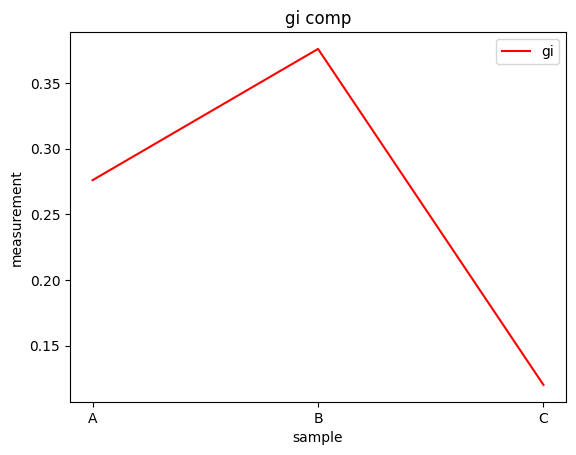

In [281]:
#グラフで比較してみる,
fig, ax = plt.subplots()

ax.plot(df.columns,gi.values(),color="r", label="gi")
#ax.plot(df.columns, mean_difference.values(), color="b", label="mean_diff")
#ax.plot(df.columns, df[df.columns].mean(), color="g", label="mean")

ax.legend(loc = "upper right")

ax.set_title("gi comp")
ax.set_xlabel("sample")
ax.set_ylabel("measurement")

plt.show()

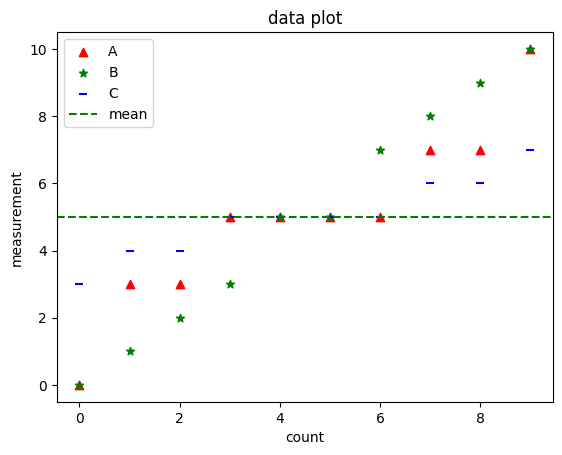

In [279]:
#元データのプロット,
fig, ax = plt.subplots()
color_list = ["r", "g", "b"]
mark_list = ["^", "*", "_"]

for i, col in enumerate(df.columns):
    ax.scatter(x=df.index,y=df[col], color=color_list[i], label=col, marker=mark_list[i])

ax.axhline(y=df["A"].mean(), color='green', linestyle='--', label='mean')

ax.legend()

ax.set_title("data plot")
ax.set_xlabel("count")
ax.set_ylabel("measurement")

plt.show()

In [282]:
# 元データの標準偏差
df.std()

A    2.708013
B    3.464102
C    1.154701
dtype: float64

In [285]:
# ジニ係数
pd.DataFrame(gi.values(), index=gi.keys())

,0
A,0.276
B,0.376
C,0.120


以上のことから, ジニ係数が大きいほど元データのばらつきが大きくなるといえる.

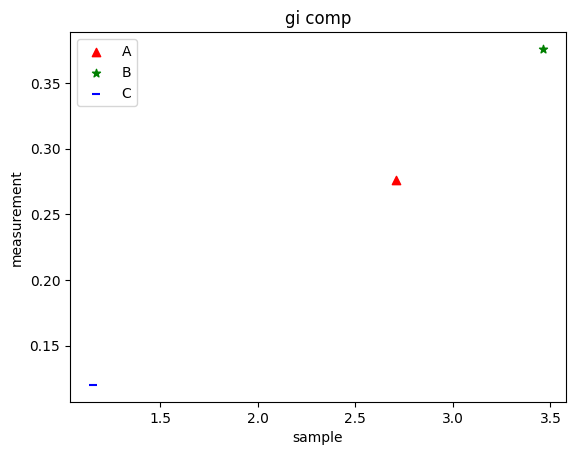

In [289]:
#std vs gi のグラフで比較してみる,
fig, ax = plt.subplots()


for i, col in enumerate(df.columns):
    ax.scatter(x=df[col].std(),y=gi[col], color=color_list[i], label=col, marker=mark_list[i])

ax.legend(loc = "upper left")

ax.set_title("gi comp")
ax.set_xlabel("sample")
ax.set_ylabel("measurement")

plt.show()